Continuing on from using decision trees to find MLB All-Stars, we can see if it is possible to use the features of the decision tree to find a single value to predict All-Stars.

In [2]:
import pandas as pd
from sklearn import linear_model

We begin by importing pandas, but we import linear_model from sklearn because we want to reduce the values

In [4]:
def createAllStarSet():
    allStars = pd.read_csv('data/2015allStars.csv')
    allStarSet = set(allStars['Starter'].tolist())
    del allStars
    return allStarSet

In [5]:
allStars = createAllStarSet()
allStars

{'A.J. Pollock',
 'Adam Jones',
 'Adrian Gonzalez',
 'Albert Pujols',
 'Alcides Escobar',
 'Alex Gordon',
 'Andrew McCutchen',
 'Anthony Rizzo',
 'Brandon Crawford',
 'Brock Holt',
 'Bryce Harper',
 'Buster Posey',
 'DJ LeMahieu',
 'Dee Gordon',
 'Giancarlo Stanton',
 'J.D. Martinez',
 'Jason Kipnis',
 'Jhonny Peralta',
 'Joc Pederson',
 'Joe Panik',
 'Jose Altuve',
 'Jose Bautista',
 'Jose Iglesias',
 'Josh Donaldson',
 'Justin Upton',
 'Kris Bryant',
 'Lorenzo Cain',
 'Manny Machado',
 'Mark Teixeira',
 'Matt Holliday',
 'Miguel Cabrera',
 'Mike Trout',
 'Nelson Cruz',
 'Nolan Arenado',
 'Paul Goldschmidt',
 'Prince Fielder',
 'Russell Martin',
 'Salvador Perez',
 'Stephen Vogt',
 'Todd Frazier',
 'Yadier Molina',
 'Yasmani Grandal'}

We can create a function to get the allStarSet. We create the set as a global variable, because we don't want to declare it each time; we may also need it in the future.

In [14]:
def checkAllStar(name):
    return name[:-1] in allStars if name[-1] in {'*','#','+'} else name in allStars

This function from part 1 will help create the field for each player.

In [51]:
def createAdvancedTable():
    df = pd.read_csv('data/2015advancedBatting.csv')
    df['Salary'] = df['Salary'].str.replace('$','')
    df = df.fillna(0)
    df['Salary'] = df['Salary'].astype(int)
    df.loc[df['Salary'] == 0, 'Salary'] = 507500 * (df['G']/162)
    
    allStars = createAllStarSet()
    df['isAllStar'] = df['Name'].apply(checkAllStar)
    
    df['WAR/162'] = df['WAR']/(df['G']/162)    
    
    df['Salary'] = df['Salary'].astype('int64')    
    
    df = df.loc[(df['Pos Summary'] != '1') & (df['Pos Summary'] != '/1') & (df['PA'] >= 162)]

    
    return df


In [52]:
batting = createAdvancedTable()
batting

/var/folders/b7/hbtzj39j4tng96ln0jphxwzr0000gn/T/ipykernel_87308/3640617710.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Salary'] = df['Salary'].str.replace('$','')


,Rk,Name,Age,Tm,G,PA,Rbat,Rbaser,Rdp,Rfield,...,162WL%,oWAR,dWAR,oRAR,Salary,Acquired,Pos Summary,Name-additional,isAllStar,WAR/162
2,3,José Abreu,28,CHW,154,668,26,-3,-1,-3,...,0.506,3.7,-1.3,36,8666000,Amateur Free Agent,*3D,abreujo02,False,3.681818
4,5,Dustin Ackley*,27,2TM,108,264,-2,-2,1,-13,...,0.491,0.4,-1.6,4,2600000,Traded,7H84/3D9,ackledu01,False,-1.500000
7,8,Matt Adams*,26,STL,60,186,-6,-1,2,2,...,0.497,-0.2,0.0,-1,534000,Amateur Draft,3H,adamsma01,False,0.000000
12,13,Nick Ahmed,25,ARI,134,459,-17,-1,1,8,...,0.498,0.2,1.5,4,508500,Traded,*6/H,ahmedni01,False,1.329851
20,21,Abraham Almonte#,26,2TM,82,258,-4,0,0,2,...,0.500,0.6,0.3,6,256882,Traded,8/H,almonab01,False,1.580488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1338,1339,Chris Young,31,NYY,140,356,6,0,-1,-3,...,0.498,1.3,-0.8,12,2500000,Free Agency,*97H8/D,youngch04,False,1.157143
1339,1340,Delmon Young,29,BAL,52,180,-6,1,-1,5,...,0.498,-0.2,0.4,-1,2250000,Free Agency,9H/D7,youngde03,False,1.246154
1342,1343,Ryan Zimmerman,30,WSN,95,390,4,0,-1,-2,...,0.497,0.9,-0.8,11,14000000,Amateur Draft,3/H7,zimmery01,False,1.193684
1345,1346,Ben Zobrist#,34,2TM,126,535,13,-1,1,-8,...,0.501,3.2,-0.8,31,7500000,Traded,47/D95H,zobribe01,False,3.085714


We know that we want to use a pruned advancedBatting, so we can create a function to call the csv file and prune it. This will also help us if we want to use other models, so it saves time writing code.

The function creates the dataframe, formats the 'Salary' field, adds the 'isAllStar' field and prunes the dataframe to meet minimum playing requirements. It also adds the 'WAR/162' field to allow WAR to be normalised over 162 games (a full season).

In [54]:
batting.loc[batting['Name'] == 'Jose Altuve']

,Rk,Name,Age,Tm,G,PA,Rbat,Rbaser,Rdp,Rfield,...,162WL%,oWAR,dWAR,oRAR,Salary,Acquired,Pos Summary,Name-additional,isAllStar,WAR/162
24,25,Jose Altuve,25,HOU,154,689,19,-4,-1,-5,...,0.509,4.5,0.1,42,2500000,Amateur Free Agent,*4/D,altuvjo01,True,4.207792


In [55]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [56]:
batting.loc[batting['Name'] == 'Jose Altuve']

,Rk,Name,Age,Tm,G,PA,Rbat,Rbaser,Rdp,Rfield,Rpos,RAA,WAA,Rrep,RAR,WAR,waaWL%,162WL%,oWAR,dWAR,oRAR,Salary,Acquired,Pos Summary,Name-additional,isAllStar,WAR/162
24,25,Jose Altuve,25,HOU,154,689,19,-4,-1,-5,4,14,1.7,23,38,4.0,0.51,0.509,4.5,0.1,42,2500000,Amateur Free Agent,*4/D,altuvjo01,True,4.207792


In [78]:
batting.loc[batting['Name'].str.contains('Alex')]

,Rk,Name,Age,Tm,G,PA,Rbat,Rbaser,Rdp,Rfield,Rpos,RAA,WAA,Rrep,RAR,WAR,waaWL%,162WL%,oWAR,dWAR,oRAR,Salary,Acquired,Pos Summary,Name-additional,isAllStar,WAR/162
31,32,Alexi Amarista*,26,SDP,118,357,-22,2,1,2,5,-13,-1.5,12,-1,-0.4,0.488,0.491,-0.6,0.7,-3,1150000,Traded,6H47/851,amarial01,False,-0.549153
54,55,Alex Avila*,28,DET,67,219,-5,-3,0,-1,2,-8,-0.8,8,0,0.0,0.488,0.495,0.1,0.1,1,5400000,Amateur Draft,23/HD,avilaal01,False,0.000000
471,472,Alex Gordon*,31,KCR,104,422,9,-1,1,5,-4,10,1.2,15,25,2.6,0.510,0.506,2.1,0.2,20,12500000,Amateur Draft,7/DH,gordoal01,True,4.050000
500,501,Alex Guerrero,28,LAD,106,230,-2,-1,-1,-3,-1,-7,-0.8,7,0,-0.1,0.493,0.495,0.2,-0.5,3,6500000,Amateur Free Agent,H75/D,guerral01,False,-0.152830
988,989,Alexei Ramírez,33,CHW,154,622,-12,-1,-1,-5,8,-11,-1.0,22,11,1.1,0.492,0.492,1.6,0.5,16,10000000,Amateur Free Agent,*6/HD1,ramiral03,False,1.157143
1027,1028,Alex Rios,34,KCR,105,411,-15,1,0,-8,-4,-27,-2.7,15,-12,-1.3,0.473,0.482,-0.5,-1.2,-4,11000000,Free Agency,9,riosal01,False,-2.005714
1041,1042,Alex Rodriguez,39,NYY,151,620,20,0,-1,-1,-12,6,0.8,22,28,3.0,0.504,0.504,3.0,-1.3,29,22000000,Traded,*DH/53,rodrial01,False,3.218543


In [57]:
import matplotlib.pyplot as plt

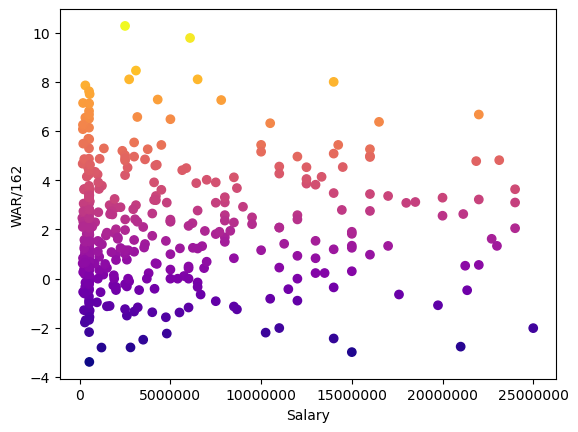

In [64]:
plotSalary, plotWARRate = batting['Salary'].to_numpy(), batting['WAR/162'].to_numpy()
plt.scatter(plotSalary,plotWARRate,c = plotWARRate, cmap = 'plasma')

plt.xlabel('Salary')
plt.ylabel('WAR/162')
plt.ticklabel_format(style = 'plain')
plt.show()

Plotting Salary against WAR/162 shows no correlation, due to young players making the league minimum.

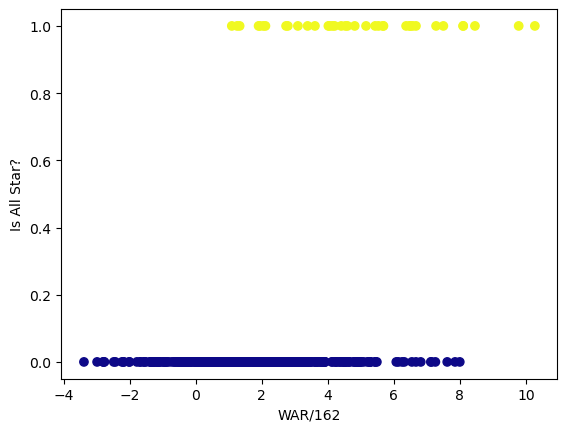

In [65]:
plotAllStar = batting['isAllStar'].to_numpy()

plt.scatter(plotWARRate,plotAllStar,c = plotAllStar, cmap = 'plasma')
plt.xlabel('WAR/162')
plt.ylabel('Is All Star?')
plt.ticklabel_format(style = 'plain')
plt.show()

Plotting WAR/162 against All Star Status shows a weak correlation, perhaps due to replacement players who earn spots after players drop out.

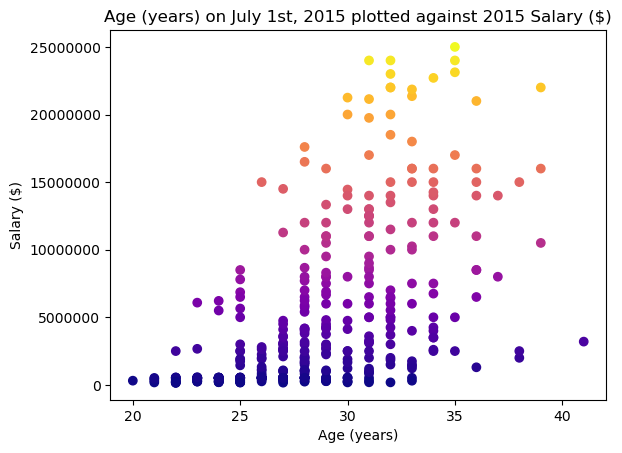

In [77]:
plotAge = batting['Age'].to_numpy()

plt.scatter(plotAge,plotSalary,c=plotSalary,cmap='plasma')
plt.title('Age (years) on July 1st, 2015 plotted against 2015 Salary ($)')
plt.xlabel('Age (years)')
plt.ylabel('Salary ($)')
plt.ticklabel_format(style = 'plain')
plt.show()

Plotting Age against Salary shows a fairly strong correlation, due to the fact that older players have generally been in the league for longer and thus sign more contracts.

In [66]:
import seaborn as sns
from seaborn import heatmap

/var/folders/b7/hbtzj39j4tng96ln0jphxwzr0000gn/T/ipykernel_87308/1364677357.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  batCorr = batting.corr()


<Axes: title={'center': 'Advanced Batting Correlation Heatmap'}>

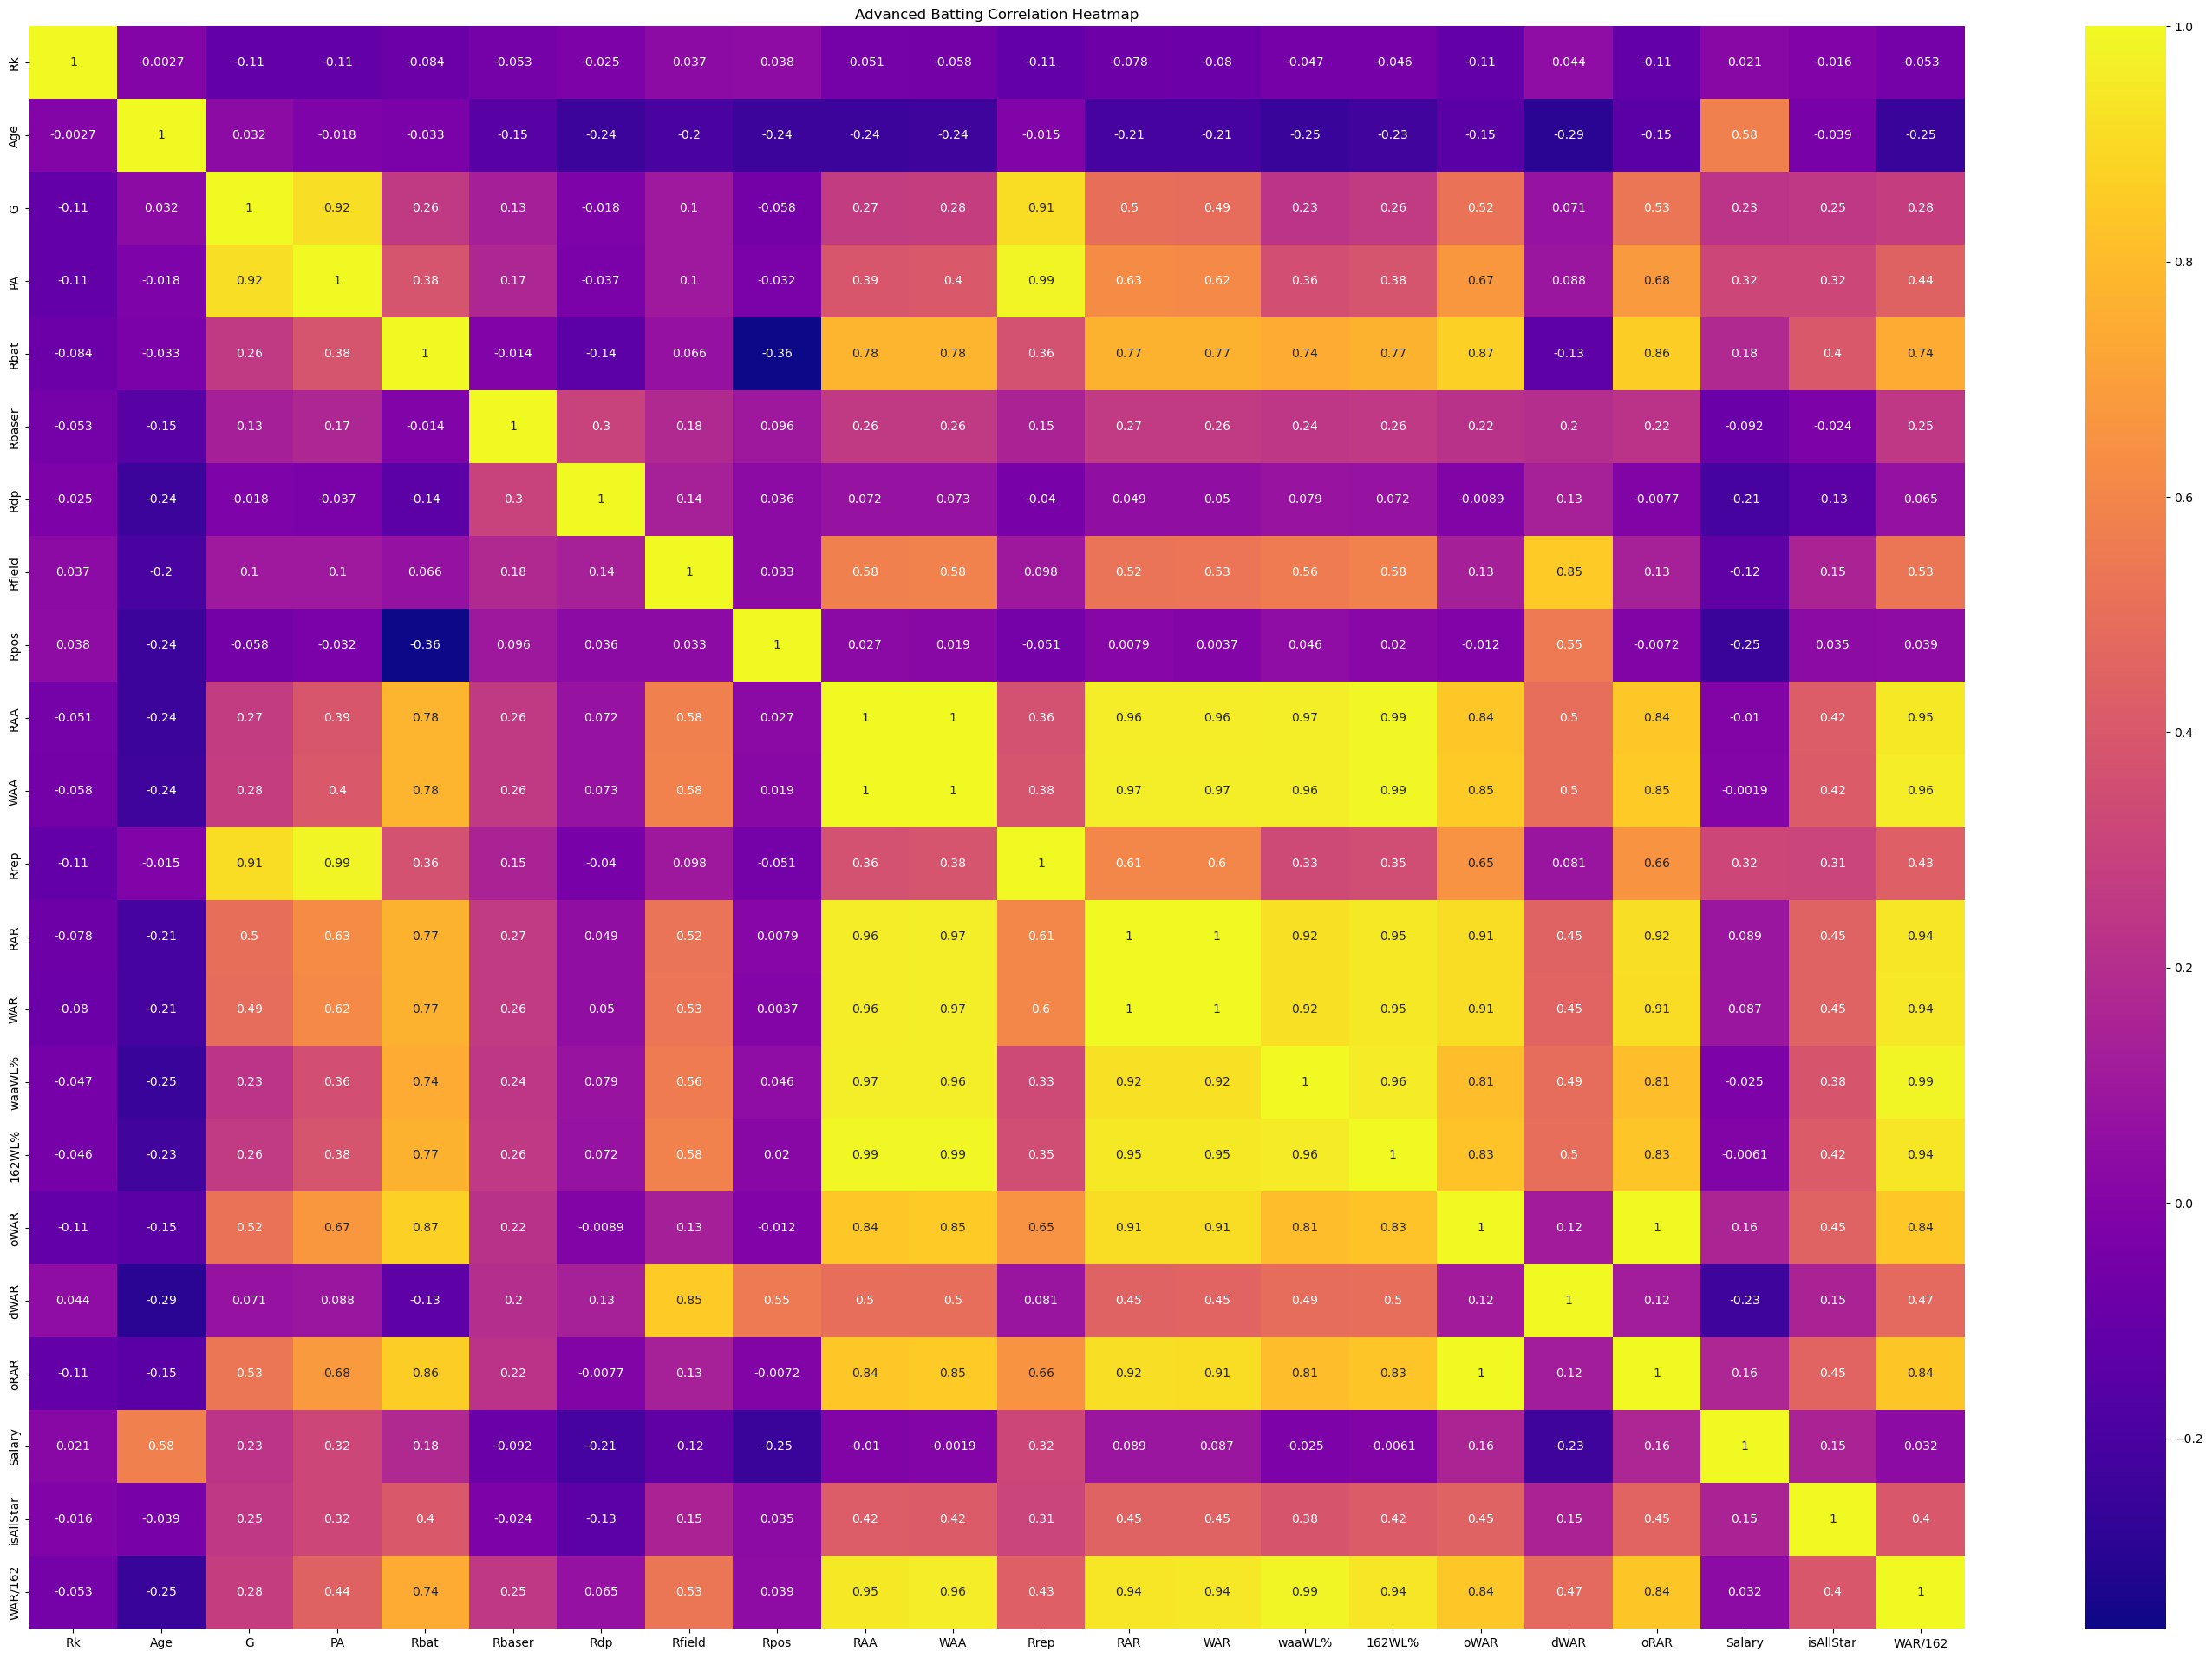

In [ ]:
batCorr = batting.corr()
plt.figure(figsize=(36,24))
plt.title('Advanced Batting Correlation Heatmap')
sns.heatmap(batCorr,cmap='plasma',annot=True)

The heatmap for batting shows that WAR/162 isn't any more correlated to an All-Star berth than other statistics.

In [71]:
trainBatting = batting.sample(frac=0.75)
trainX, trainY = trainBatting['WAR/162'].to_numpy().reshape(-1,1), trainBatting['isAllStar'].to_numpy()
WAR162Model = linear_model.LogisticRegression()
WAR162Model.fit(trainX,trainY)

LogisticRegression()

To test this, we will use Logistic Regression as it will allow us to estimate the probability of a player with a certain WAR/162 value being an All-Star.

In [73]:
testBatting = batting.sample(frac=0.25)
testX, testYActual = testBatting['WAR/162'].to_numpy().reshape(-1,1), testBatting['isAllStar'].to_numpy()
testYPredicted = WAR162Model.predict(testX)

In [74]:
from sklearn import metrics

In [75]:
def plotConfusionMatrix(actual,predicted):
    cMatrix = metrics.confusion_matrix(actual,predicted)
    cMDisplay = metrics.ConfusionMatrixDisplay(confusion_matrix=cMatrix, display_labels=['Not an All-Star','All-Star'])
    cMDisplay.plot()
    plt.show()
    
def getMetrics(actual,predicted):
    accuracy = metrics.accuracy_score(actual,predicted)*100
    precision = metrics.precision_score(actual,predicted)*100
    recall = metrics.recall_score(actual,predicted)*100
    specificity = metrics.recall_score(actual,predicted,pos_label=0)*100
    
    print(f'{accuracy}% of samples accurately predicted')
    print(f'{precision}% of positive predicted samples are positive')
    print(f'{recall}% of positive samples were predicted as positive')
    print(f'{specificity}% of negative samples were predicted as negative')

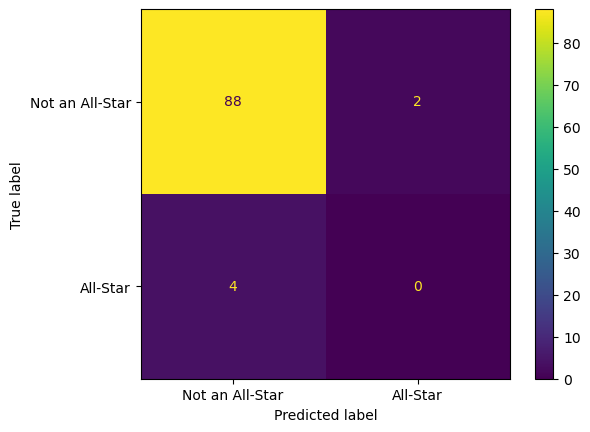

93.61702127659575% of samples accurately predicted
0.0% of positive predicted samples are positive
0.0% of positive samples were predicted as positive
97.77777777777777% of negative samples were predicted as negative


In [76]:
plotConfusionMatrix(testYActual,testYPredicted)
getMetrics(testYActual,testYPredicted)

This model is poor at predicting All-Stars, as the precision and recall are poor.

In [83]:
batting 

,Rk,Name,Age,Tm,G,PA,Rbat,Rbaser,Rdp,Rfield,Rpos,RAA,WAA,Rrep,RAR,WAR,waaWL%,162WL%,oWAR,dWAR,oRAR,Salary,Acquired,Pos Summary,Name-additional,isAllStar,WAR/162
2,3,José Abreu,28,CHW,154,668,26,-3,-1,-3,-10,9,1.2,23,33,3.5,0.506,0.506,3.7,-1.3,36,8666000,Amateur Free Agent,*3D,abreujo02,False,3.681818
4,5,Dustin Ackley*,27,2TM,108,264,-2,-2,1,-13,-3,-18,-1.9,9,-9,-1.0,0.482,0.491,0.4,-1.6,4,2600000,Traded,7H84/3D9,ackledu01,False,-1.500000
7,8,Matt Adams*,26,STL,60,186,-6,-1,2,2,-2,-5,-0.6,6,1,0.0,0.491,0.497,-0.2,0.0,-1,534000,Amateur Draft,3H,adamsma01,False,0.000000
12,13,Nick Ahmed,25,ARI,134,459,-17,-1,1,8,6,-3,-0.4,15,12,1.1,0.498,0.498,0.2,1.5,4,508500,Traded,*6/H,ahmedni01,False,1.329851
20,21,Abraham Almonte#,26,2TM,82,258,-4,0,0,2,1,-1,0.0,9,8,0.8,0.499,0.500,0.6,0.3,6,256882,Traded,8/H,almonab01,False,1.580488
22,23,Yonder Alonso*,28,SDP,103,402,4,-1,-1,10,-5,6,0.6,13,19,1.9,0.507,0.504,0.8,0.5,9,1650000,Traded,3/H5,alonsyo01,False,2.988350
24,25,Jose Altuve,25,HOU,154,689,19,-4,-1,-5,4,14,1.7,23,38,4.0,0.510,0.509,4.5,0.1,42,2500000,Amateur Free Agent,*4/D,altuvjo01,True,4.207792
29,30,Pedro Álvarez*,28,PIT,150,491,6,0,2,-14,-6,-13,-1.5,16,3,0.1,0.491,0.491,1.6,-2.2,17,5750000,Amateur Draft,*3H/D,alvarpe01,False,0.108000
31,32,Alexi Amarista*,26,SDP,118,357,-22,2,1,2,5,-13,-1.5,12,-1,-0.4,0.488,0.491,-0.6,0.7,-3,1150000,Traded,6H47/851,amarial01,False,-0.549153
37,38,Elvis Andrus,26,TEX,160,661,-14,3,0,-5,9,-7,-0.6,24,16,1.8,0.495,0.495,2.2,0.5,21,15000000,Traded,*6,andruel01,False,1.822500


In [86]:
batting['cummulatSumTotal'] = batting["oRAR"] + batting["Rbaser"] + batting["Rdp"] + batting["oWAR"] + batting["WAA"]
batting['cummulatSum/162'] = batting['cummulatSumTotal']/(batting['G']/162)

batting['cummulatSumTotalNoWAR'] = batting['cummulatSumTotal'] - batting["oWAR"]
batting['cummulatSumNoWAR/162'] = batting['cummulatSumTotalNoWAR']/(batting['G']/162)

batting['cummulatProdTotal'] = batting["oRAR"] * batting["Rbaser"] * batting["Rdp"] * batting["oWAR"] * batting["WAA"]
batting['cummulatProdTotal/162'] = batting['cummulatProdTotal']/(batting['G']/162)

batting['cummulatProdTotalNoWAR'] = batting['cummulatProdTotal'] / batting["oWAR"]
batting['cummulatProdTotalNoWAR/162'] = batting['cummulatProdTotalNoWAR']/(batting['G']/162)

To further test logistic regression, we can create a single variable to use in a model. We can use the product and sum of the values from the decision tree models (oRAR, Rbaser, Rdp, oWAR, WAA); oWAR can be added and removed, due to fact that WAR itself has a weak correlation to being an All-Star, however, it may have a better correlation in conjunction with other statistics.

In [87]:
batting

,Rk,Name,Age,Tm,G,PA,Rbat,Rbaser,Rdp,Rfield,Rpos,RAA,WAA,Rrep,RAR,WAR,waaWL%,162WL%,oWAR,dWAR,oRAR,Salary,Acquired,Pos Summary,Name-additional,isAllStar,WAR/162,cummulatSumTotal,cummulatSum/162,cummulatSumTotalNoWAR,cummulatSumNoWAR/162,cummulatProdTotal,cummulatProdTotal/162,cummulatProdTotalNoWAR,cummulatProdTotalNoWAR/162
2,3,José Abreu,28,CHW,154,668,26,-3,-1,-3,-10,9,1.2,23,33,3.5,0.506,0.506,3.7,-1.3,36,8666000,Amateur Free Agent,*3D,abreujo02,False,3.681818,36.9,38.816883,33.2,34.924675,479.52,504.430130,129.6,136.332468
4,5,Dustin Ackley*,27,2TM,108,264,-2,-2,1,-13,-3,-18,-1.9,9,-9,-1.0,0.482,0.491,0.4,-1.6,4,2600000,Traded,7H84/3D9,ackledu01,False,-1.500000,1.5,2.250000,1.1,1.650000,6.08,9.120000,15.2,22.800000
7,8,Matt Adams*,26,STL,60,186,-6,-1,2,2,-2,-5,-0.6,6,1,0.0,0.491,0.497,-0.2,0.0,-1,534000,Amateur Draft,3H,adamsma01,False,0.000000,-0.8,-2.160000,-0.6,-1.620000,0.24,0.648000,-1.2,-3.240000
12,13,Nick Ahmed,25,ARI,134,459,-17,-1,1,8,6,-3,-0.4,15,12,1.1,0.498,0.498,0.2,1.5,4,508500,Traded,*6/H,ahmedni01,False,1.329851,3.8,4.594030,3.6,4.352239,0.32,0.386866,1.6,1.934328
20,21,Abraham Almonte#,26,2TM,82,258,-4,0,0,2,1,-1,0.0,9,8,0.8,0.499,0.500,0.6,0.3,6,256882,Traded,8/H,almonab01,False,1.580488,6.6,13.039024,6.0,11.853659,0.00,0.000000,0.0,0.000000
22,23,Yonder Alonso*,28,SDP,103,402,4,-1,-1,10,-5,6,0.6,13,19,1.9,0.507,0.504,0.8,0.5,9,1650000,Traded,3/H5,alonsyo01,False,2.988350,8.4,13.211650,7.6,11.953398,4.32,6.794563,5.4,8.493204
24,25,Jose Altuve,25,HOU,154,689,19,-4,-1,-5,4,14,1.7,23,38,4.0,0.510,0.509,4.5,0.1,42,2500000,Amateur Free Agent,*4/D,altuvjo01,True,4.207792,43.2,45.444156,38.7,40.710390,1285.20,1351.963636,285.6,300.436364
29,30,Pedro Álvarez*,28,PIT,150,491,6,0,2,-14,-6,-13,-1.5,16,3,0.1,0.491,0.491,1.6,-2.2,17,5750000,Amateur Draft,*3H/D,alvarpe01,False,0.108000,19.1,20.628000,17.5,18.900000,-0.00,-0.000000,-0.0,-0.000000
31,32,Alexi Amarista*,26,SDP,118,357,-22,2,1,2,5,-13,-1.5,12,-1,-0.4,0.488,0.491,-0.6,0.7,-3,1150000,Traded,6H47/851,amarial01,False,-0.549153,-2.1,-2.883051,-1.5,-2.059322,-5.40,-7.413559,9.0,12.355932
37,38,Elvis Andrus,26,TEX,160,661,-14,3,0,-5,9,-7,-0.6,24,16,1.8,0.495,0.495,2.2,0.5,21,15000000,Traded,*6,andruel01,False,1.822500,25.6,25.920000,23.4,23.692500,-0.00,-0.000000,-0.0,-0.000000


/var/folders/b7/hbtzj39j4tng96ln0jphxwzr0000gn/T/ipykernel_87308/3153117802.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  batCorr2 = batting.corr()


<Axes: title={'center': 'Advanced Batting Correlation Heatmap (No Pitchers, min. 162 PA)'}>

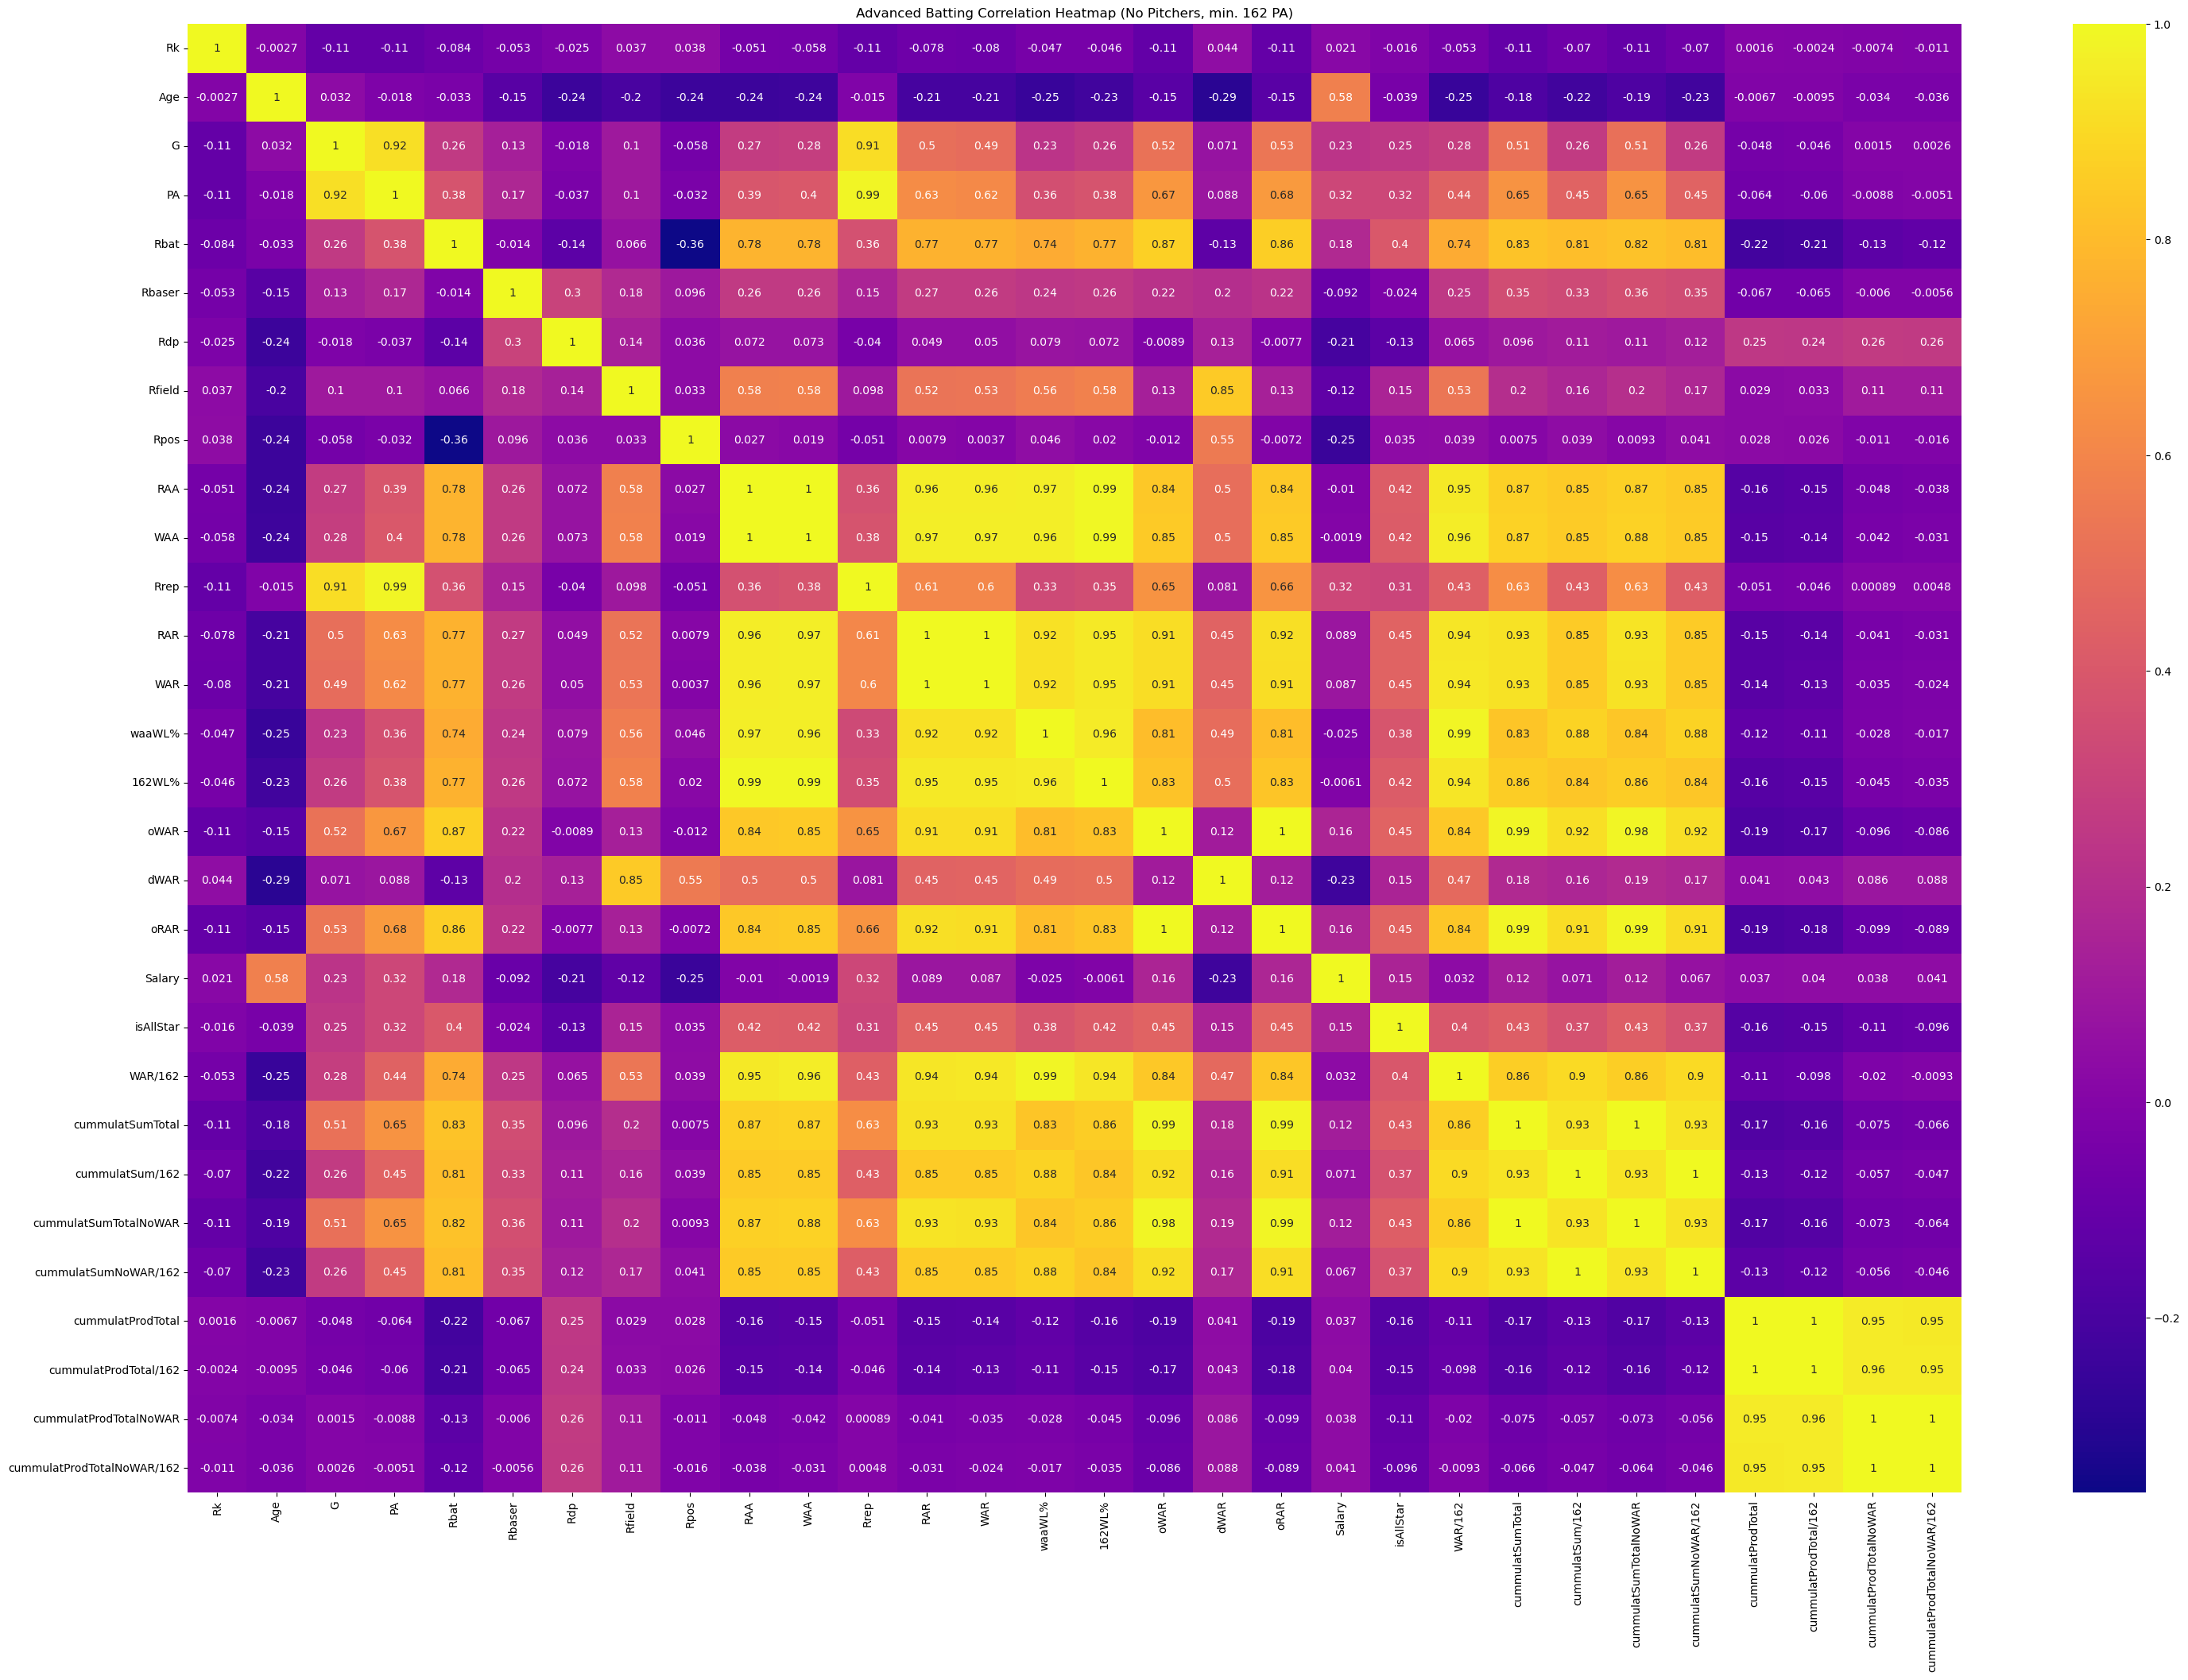

In [88]:
batCorr2 = batting.corr()
plt.figure(figsize=(36,24))
plt.title('Advanced Batting Correlation Heatmap (No Pitchers, min. 162 PA)')
sns.heatmap(batCorr2,cmap='plasma',annot=True)

The heatmap shows that sum stats have better correlation with 'isAllStar', but it is still as strong as other stats.

In [91]:
def createPlots(dataFrame,stats,y):
    for stat in stats:
        
        xList, yList = dataFrame[y].to_numpy(), dataFrame[stat].to_numpy()
        plt.title(f'{stat} against {y}')
        plt.ylabel(f'{stat}')
        plt.xlabel(f'{y}')
        plt.scatter(xList, yList, c = yList, cmap = 'plasma')
        plt.ticklabel_format(style = 'plain')
        plt.show()

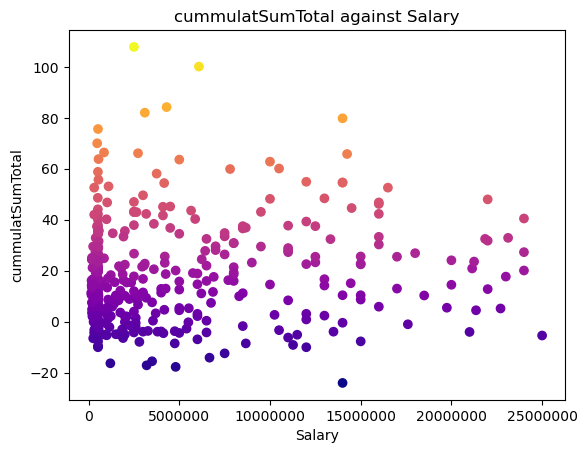

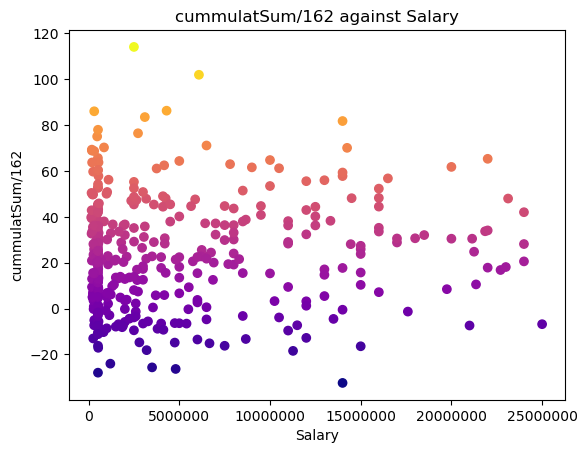

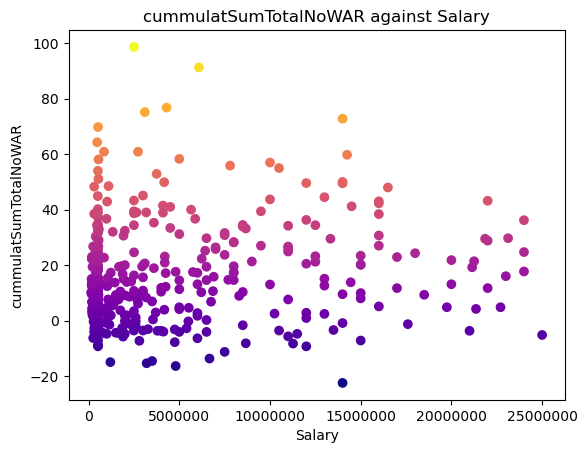

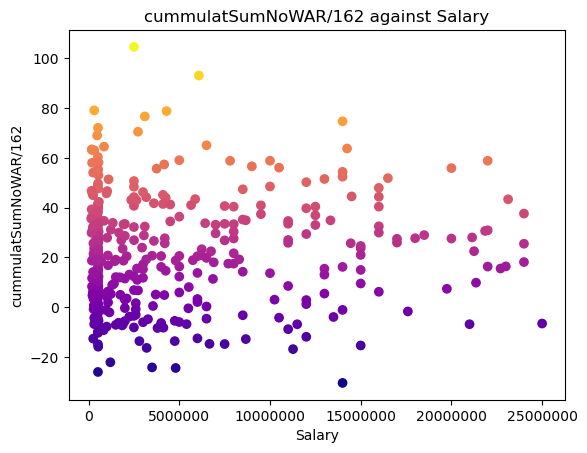

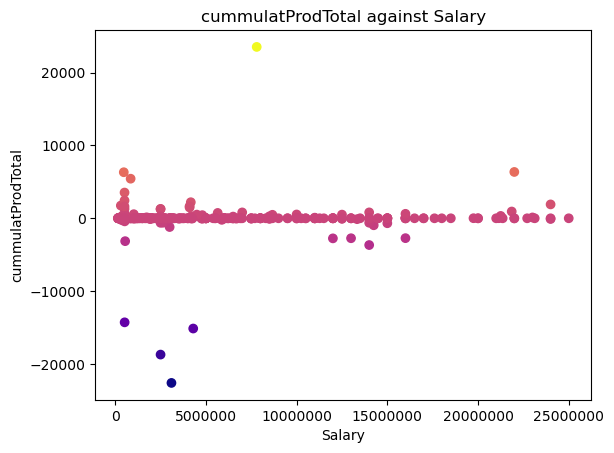

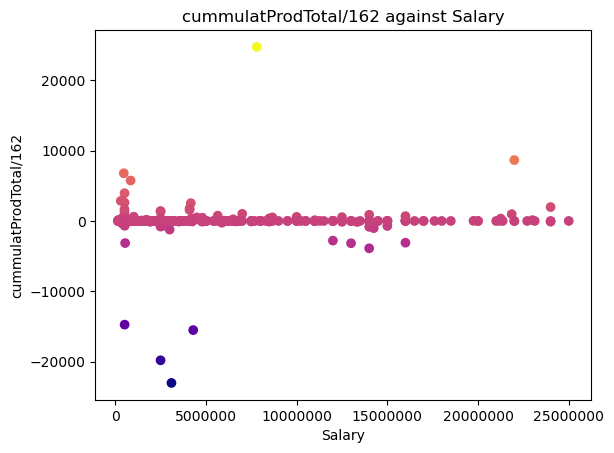

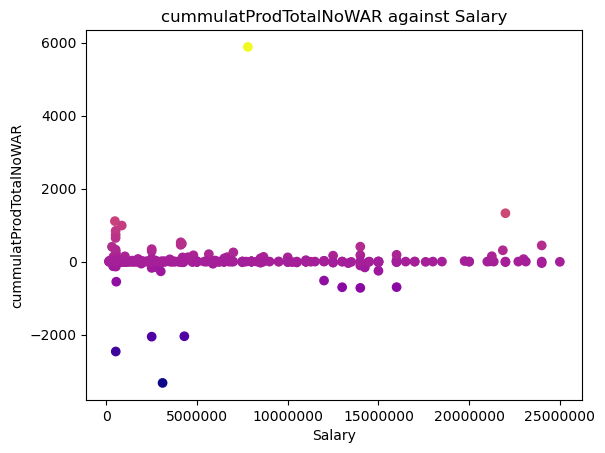

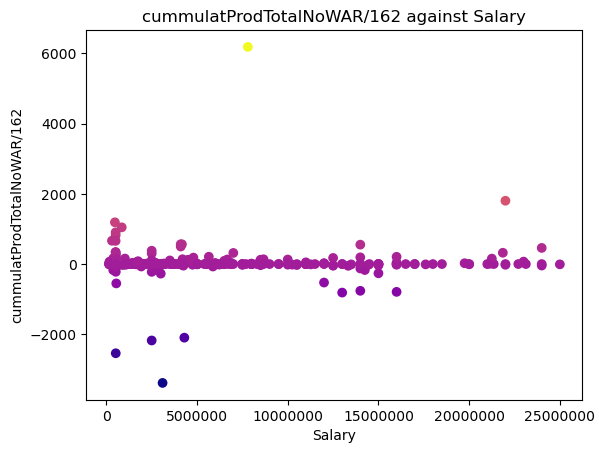

In [92]:
advancedStatList = ['cummulatSumTotal','cummulatSum/162','cummulatSumTotalNoWAR','cummulatSumNoWAR/162','cummulatProdTotal','cummulatProdTotal/162','cummulatProdTotalNoWAR','cummulatProdTotalNoWAR/162']
createPlots(batting,advancedStatList,'Salary')


Plotting the new stats against Salary show the same weak correlation as WAR/162.

In [93]:
def createPlots(dataFrame,stats,y):
    for stat in stats:
        
        xList, yList = dataFrame[stat].to_numpy(), dataFrame[y].to_numpy()
        plt.title(f'{stat} against {y}')
        plt.ylabel(f'{y}')
        plt.xlabel(f'{stat}')
        plt.scatter(xList, yList, c = yList, cmap = 'plasma')
        plt.ticklabel_format(style = 'plain')
        plt.show()

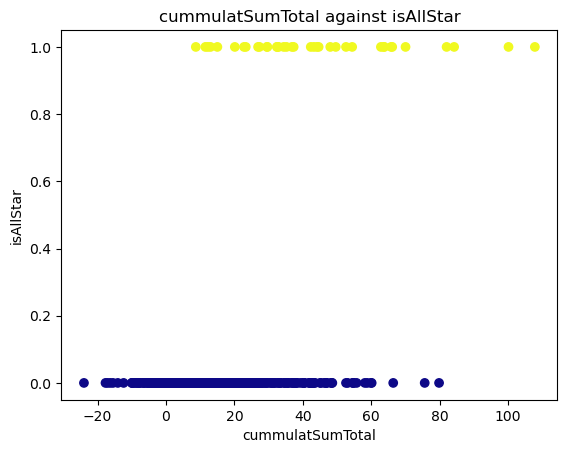

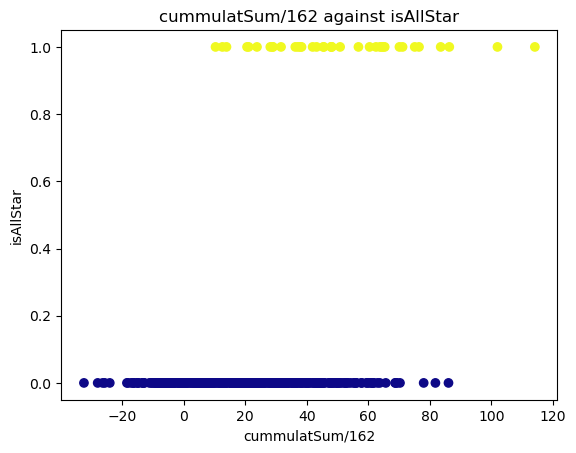

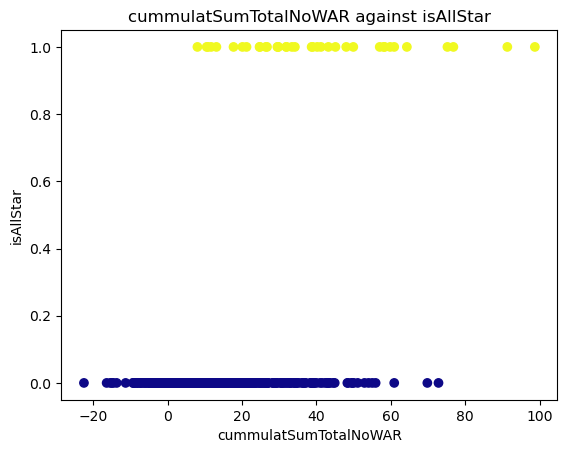

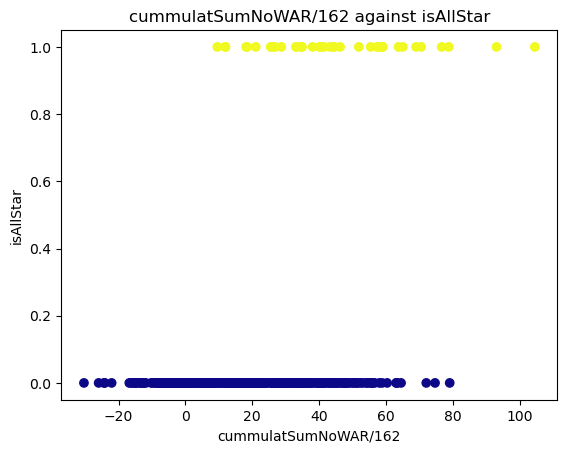

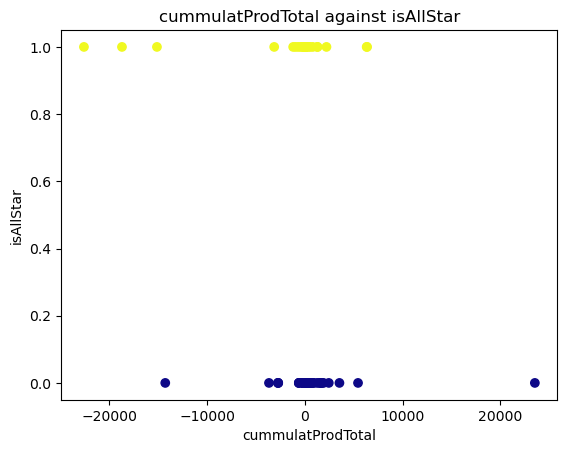

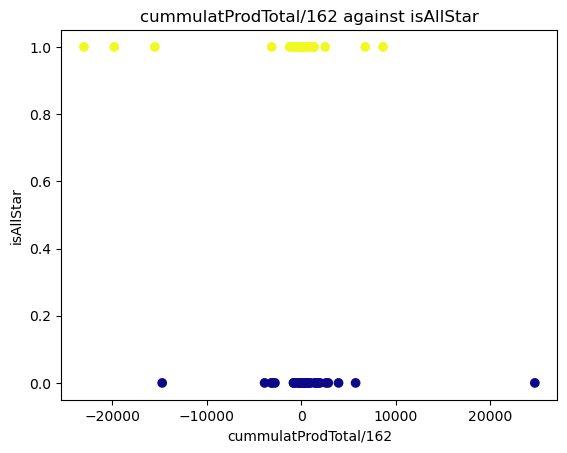

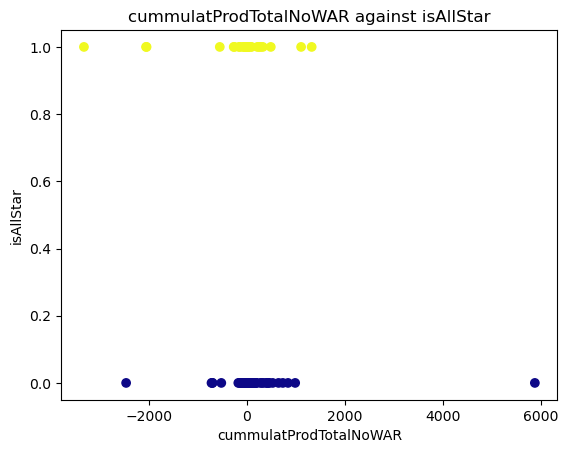

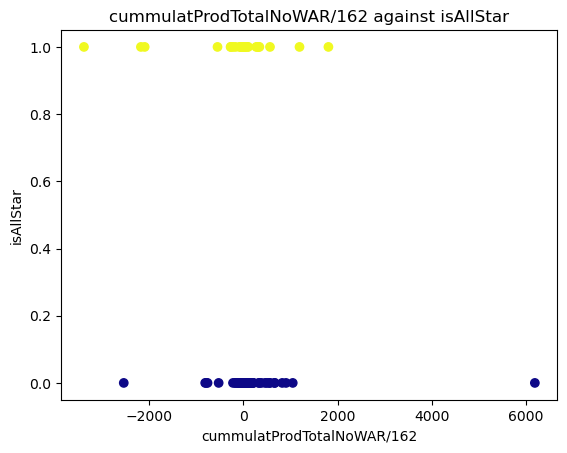

In [94]:
createPlots(batting,advancedStatList,'isAllStar')

Some of the logistic regression graphs look fairly promising, however, the performance of the model will determine that.

In [105]:
def createModels(dataframe,stats,y):
    train, test = dataframe.sample(frac=0.75), dataframe.sample(frac=0.25)
    models = {}
    trainYActual, testYActual = train[y].to_numpy(), test[y].to_numpy()
    for stat in stats:
        trainX, testX = train[stat].to_numpy().reshape(-1,1), test[stat].to_numpy().reshape(-1,1)
        model = linear_model.LogisticRegression()
        model.fit(trainX,trainYActual)
        testYPred = model.predict(testX)
        plotConfusionMatrixWithLabels(testYActual,testYPred,stat)
        getMetricsWithLabels(testYActual,testYPred)
        models[stat] = model
    
    return models
    

This function will create a logistic regression for each stat in stats and y and print the metrics.

In [109]:
def plotConfusionMatrixWithLabels(actual,predicted,label):
    cMatrix = metrics.confusion_matrix(actual,predicted)
    cMDisplay = metrics.ConfusionMatrixDisplay(confusion_matrix=cMatrix, display_labels=['Not an All-Star','All-Star'])
    cMDisplay.plot()
    plt.title(label)
    plt.show()
    
def getMetricsWithLabels(actual,predicted):
    accuracy = metrics.accuracy_score(actual, predicted) * 100
    precision = metrics.precision_score(actual, predicted, zero_division = 0)  * 100
    recall = metrics.recall_score(actual, predicted, zero_division = 0) * 100
    specificity = metrics.recall_score(actual, predicted, pos_label = 0, zero_division = 0) * 100
    
    print(f'ACCURACY - {accuracy}% of samples accurately predicted')
    print(f'PRECISION - {precision}% of positive predicted samples are positive')
    print(f'RECALL - {recall}% of positive samples were predicted as positive')
    print(f'SPECIFICITY - {specificity}% of negative samples were predicted as negative')

[[ 2.010e+01]
 [-5.100e+00]
 [ 2.560e+01]
 [ 2.690e+01]
 [ 5.490e+01]
 [ 2.260e+01]
 [ 4.200e+01]
 [ 4.520e+01]
 [-6.000e-01]
 [-3.500e+00]
 [ 4.510e+01]
 [ 7.600e+00]
 [ 2.100e+01]
 [ 2.800e+01]
 [ 4.680e+01]
 [ 1.580e+01]
 [-1.400e+00]
 [ 2.670e+01]
 [ 4.230e+01]
 [ 5.300e+00]
 [-1.000e+00]
 [ 3.660e+01]
 [ 3.790e+01]
 [ 5.570e+01]
 [ 2.910e+01]
 [ 9.900e+00]
 [ 4.320e+01]
 [-5.000e+00]
 [ 1.390e+01]
 [-2.000e-01]
 [ 2.950e+01]
 [ 6.700e+00]
 [ 2.330e+01]
 [-8.500e+00]
 [ 2.200e+00]
 [-8.500e+00]
 [ 7.600e+00]
 [ 9.300e+00]
 [ 3.330e+01]
 [ 1.780e+01]
 [-5.000e+00]
 [-7.900e+00]
 [ 9.300e+00]
 [ 6.640e+01]
 [ 2.390e+01]
 [ 1.100e+01]
 [ 8.400e+00]
 [ 1.640e+01]
 [ 2.590e+01]
 [-2.400e+01]
 [ 3.570e+01]
 [ 4.800e+01]
 [ 2.160e+01]
 [ 1.040e+01]
 [ 3.470e+01]
 [-3.000e+00]
 [ 5.500e+00]
 [ 4.500e+00]
 [-1.000e+00]
 [ 1.150e+01]
 [ 5.100e+00]
 [ 1.390e+01]
 [ 2.780e+01]
 [-4.900e+00]
 [ 6.600e+00]
 [ 1.950e+01]
 [ 1.000e+01]
 [ 2.010e+01]
 [ 4.700e+00]
 [ 2.400e+00]
 [ 6.610e+01]
 [ 8.6

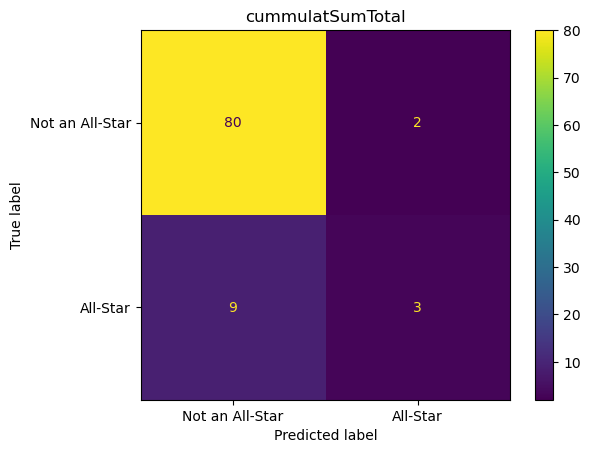

ACCURACY - 88.29787234042553% of samples accurately predicted
PRECISION - 60.0% of positive predicted samples are positive
RECALL - 25.0% of positive samples were predicted as positive
SPECIFICITY - 97.5609756097561% of negative samples were predicted as negative
[[ 20.60886076]
 [ -7.24736842]
 [ 25.92      ]
 [ 29.052     ]
 [ 55.58625   ]
 [ 32.4       ]
 [ 68.72727273]
 [ 45.48074534]
 [ -0.82372881]
 [ -5.3490566 ]
 [ 49.03489933]
 [ 15.58481013]
 [ 28.83050847]
 [ 29.07692308]
 [ 48.29044586]
 [ 22.45263158]
 [ -4.36153846]
 [ 29.22567568]
 [ 47.92027972]
 [  6.0041958 ]
 [ -1.28571429]
 [ 38.00769231]
 [ 48.72857143]
 [ 57.84230769]
 [ 29.6490566 ]
 [ 15.42115385]
 [ 45.44415584]
 [ -5.78571429]
 [ 23.21443299]
 [ -0.27457627]
 [ 40.84615385]
 [  9.60530973]
 [ 36.29423077]
 [-13.24038462]
 [  6.14482759]
 [-14.80645161]
 [ 22.8       ]
 [ 15.37346939]
 [ 35.25882353]
 [ 35.16585366]
 [-10.25316456]
 [-14.71034483]
 [ 13.57297297]
 [ 70.30588235]
 [ 30.48661417]
 [ 17.30097087]


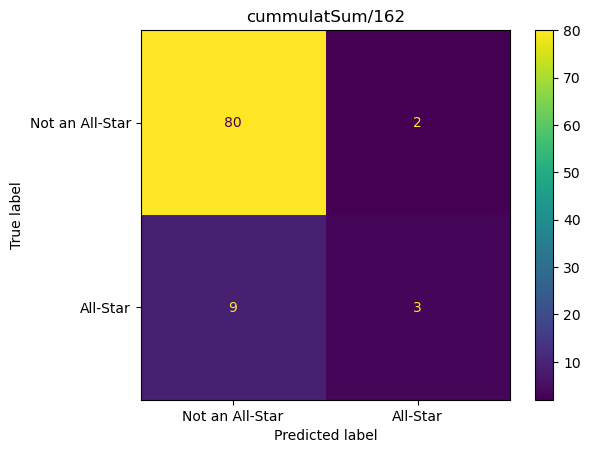

ACCURACY - 88.29787234042553% of samples accurately predicted
PRECISION - 60.0% of positive predicted samples are positive
RECALL - 25.0% of positive samples were predicted as positive
SPECIFICITY - 97.5609756097561% of negative samples were predicted as negative
[[ 17.7]
 [ -4.8]
 [ 23.4]
 [ 24.8]
 [ 49.6]
 [ 20.5]
 [ 38.5]
 [ 41. ]
 [ -0.8]
 [ -3. ]
 [ 41.5]
 [  6.9]
 [ 19.6]
 [ 26. ]
 [ 43. ]
 [ 14.5]
 [ -1.2]
 [ 24.6]
 [ 39. ]
 [  5. ]
 [ -1.3]
 [ 33.9]
 [ 34.4]
 [ 51.1]
 [ 26.7]
 [  9.1]
 [ 38.7]
 [ -4.8]
 [ 13. ]
 [ -0.3]
 [ 27. ]
 [  6. ]
 [ 21.2]
 [ -8.2]
 [  1.9]
 [ -7.8]
 [  6.9]
 [  8.3]
 [ 30.7]
 [ 16.3]
 [ -4.5]
 [ -7.3]
 [  8.3]
 [ 60.9]
 [ 22. ]
 [  9.7]
 [  7.6]
 [ 14.7]
 [ 23.3]
 [-22.5]
 [ 32.9]
 [ 43.2]
 [ 19.5]
 [  9.5]
 [ 32. ]
 [ -2.7]
 [  4.7]
 [  4.2]
 [ -0.9]
 [ 10.8]
 [  4.9]
 [ 12.7]
 [ 25.2]
 [ -4. ]
 [  6. ]
 [ 18.1]
 [  8.9]
 [ 18.4]
 [  3.9]
 [  2.4]
 [ 60.9]
 [  7.8]
 [ 48.3]
 [ 19.4]
 [ 18.9]
 [ -1.7]
 [  7.6]
 [ 12.2]
 [ -3.7]
 [  6.3]
 [ 34.4]
 [  1.8

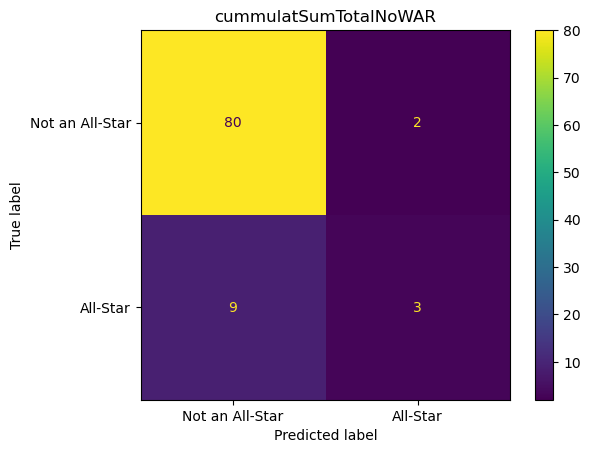

ACCURACY - 88.29787234042553% of samples accurately predicted
PRECISION - 60.0% of positive predicted samples are positive
RECALL - 25.0% of positive samples were predicted as positive
SPECIFICITY - 97.5609756097561% of negative samples were predicted as negative
[[ 18.14810127]
 [ -6.82105263]
 [ 23.6925    ]
 [ 26.784     ]
 [ 50.22      ]
 [ 29.38938053]
 [ 63.        ]
 [ 41.25465839]
 [ -1.09830508]
 [ -4.58490566]
 [ 45.12080537]
 [ 14.14936709]
 [ 26.90847458]
 [ 27.        ]
 [ 44.36942675]
 [ 20.60526316]
 [ -3.73846154]
 [ 26.92702703]
 [ 44.18181818]
 [  5.66433566]
 [ -1.67142857]
 [ 35.20384615]
 [ 44.22857143]
 [ 53.06538462]
 [ 27.20377358]
 [ 14.175     ]
 [ 40.71038961]
 [ -5.55428571]
 [ 21.71134021]
 [ -0.41186441]
 [ 37.38461538]
 [  8.60176991]
 [ 33.02307692]
 [-12.77307692]
 [  5.30689655]
 [-13.58709677]
 [ 20.7       ]
 [ 13.72040816]
 [ 32.50588235]
 [ 32.20243902]
 [ -9.2278481 ]
 [-13.59310345]
 [ 12.11351351]
 [ 64.48235294]
 [ 28.06299213]
 [ 15.25631068]


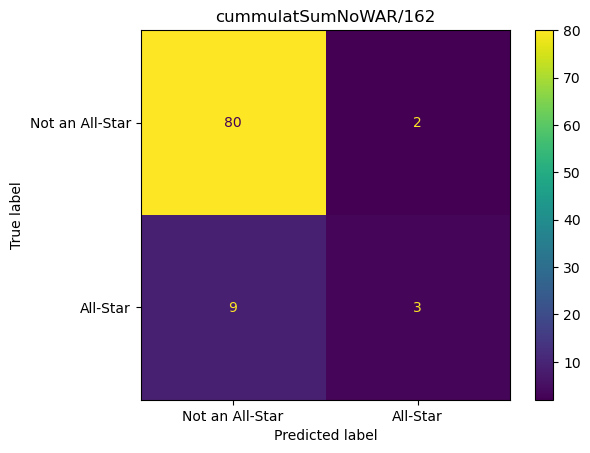

ACCURACY - 88.29787234042553% of samples accurately predicted
PRECISION - 60.0% of positive predicted samples are positive
RECALL - 25.0% of positive samples were predicted as positive
SPECIFICITY - 97.5609756097561% of negative samples were predicted as negative
[[-9.936000e+01]
 [ 0.000000e+00]
 [-0.000000e+00]
 [ 3.696000e+01]
 [-2.756000e+03]
 [ 2.310000e+01]
 [ 0.000000e+00]
 [ 5.040000e+02]
 [-2.880000e+00]
 [-3.000000e+00]
 [ 1.652400e+03]
 [-0.000000e+00]
 [ 5.040000e+01]
 [ 0.000000e+00]
 [ 0.000000e+00]
 [-8.450000e+00]
 [ 4.000000e-02]
 [ 0.000000e+00]
 [ 0.000000e+00]
 [-0.000000e+00]
 [-2.070000e+00]
 [-8.424000e+01]
 [ 2.856000e+02]
 [ 0.000000e+00]
 [ 0.000000e+00]
 [-0.000000e+00]
 [ 1.285200e+03]
 [ 0.000000e+00]
 [ 0.000000e+00]
 [ 1.380000e+00]
 [-0.000000e+00]
 [-0.000000e+00]
 [-5.040000e+01]
 [ 0.000000e+00]
 [-0.000000e+00]
 [ 7.560000e+00]
 [-0.000000e+00]
 [ 6.300000e+00]
 [ 9.828000e+01]
 [ 0.000000e+00]
 [ 0.000000e+00]
 [ 0.000000e+00]
 [-0.000000e+00]
 [ 5.

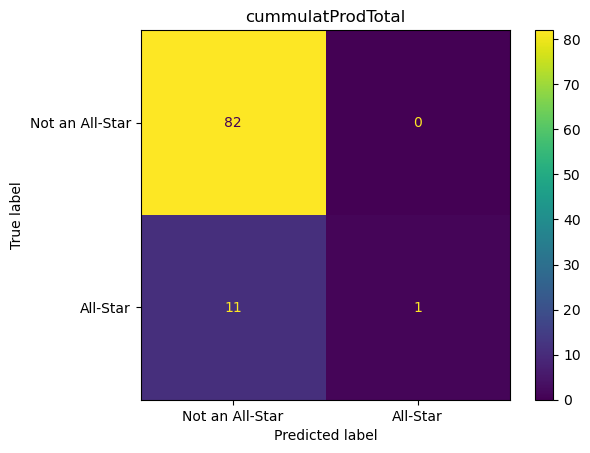

ACCURACY - 88.29787234042553% of samples accurately predicted
PRECISION - 100.0% of positive predicted samples are positive
RECALL - 8.333333333333332% of positive samples were predicted as positive
SPECIFICITY - 100.0% of negative samples were predicted as negative
[[-1.01875443e+02]
 [ 0.00000000e+00]
 [-0.00000000e+00]
 [ 3.99168000e+01]
 [-2.79045000e+03]
 [ 3.31168142e+01]
 [ 0.00000000e+00]
 [ 5.07130435e+02]
 [-3.95389831e+00]
 [-4.58490566e+00]
 [ 1.79656913e+03]
 [-0.00000000e+00]
 [ 6.91932203e+01]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-1.20078947e+01]
 [ 1.24615385e-01]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-0.00000000e+00]
 [-2.66142857e+00]
 [-8.74800000e+01]
 [ 3.67200000e+02]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-0.00000000e+00]
 [ 1.35196364e+03]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 1.89457627e+00]
 [-0.00000000e+00]
 [-0.00000000e+00]
 [-7.85076923e+01]
 [ 0.00000000e+00]
 [-0.00000000e+00]
 [ 1.31690323e+01]
 [-0.00000000e+00]
 [ 1.04142857e+01]
 [ 1.040611

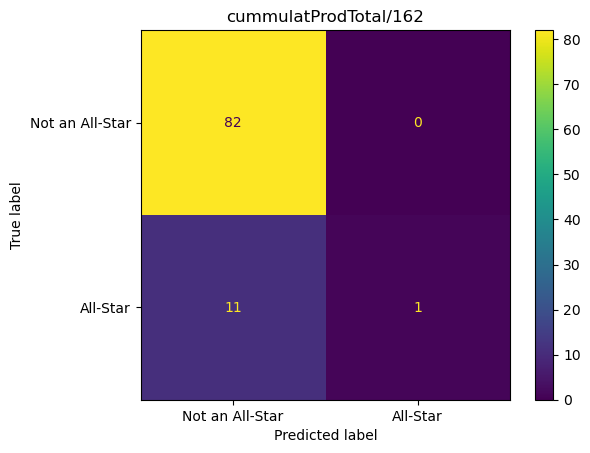

ACCURACY - 88.29787234042553% of samples accurately predicted
PRECISION - 100.0% of positive predicted samples are positive
RECALL - 8.333333333333332% of positive samples were predicted as positive
SPECIFICITY - 100.0% of negative samples were predicted as negative
[[-4.1400e+01]
 [-0.0000e+00]
 [-0.0000e+00]
 [ 1.7600e+01]
 [-5.2000e+02]
 [ 1.1000e+01]
 [ 0.0000e+00]
 [ 1.2000e+02]
 [-1.4400e+01]
 [ 6.0000e+00]
 [ 4.5900e+02]
 [-0.0000e+00]
 [ 3.6000e+01]
 [ 0.0000e+00]
 [ 0.0000e+00]
 [-6.5000e+00]
 [-2.0000e-01]
 [ 0.0000e+00]
 [ 0.0000e+00]
 [-0.0000e+00]
 [-6.9000e+00]
 [-3.1200e+01]
 [ 8.1600e+01]
 [ 0.0000e+00]
 [ 0.0000e+00]
 [-0.0000e+00]
 [ 2.8560e+02]
 [-0.0000e+00]
 [ 0.0000e+00]
 [ 1.3800e+01]
 [-0.0000e+00]
 [-0.0000e+00]
 [-2.4000e+01]
 [-0.0000e+00]
 [-0.0000e+00]
 [-1.0800e+01]
 [-0.0000e+00]
 [ 6.3000e+00]
 [ 3.7800e+01]
 [ 0.0000e+00]
 [-0.0000e+00]
 [-0.0000e+00]
 [-0.0000e+00]
 [ 9.8800e+02]
 [ 0.0000e+00]
 [-1.2600e+01]
 [-0.0000e+00]
 [ 1.1200e+01]
 [ 4.2500e+01

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [101]:
battingModels = createModels(batting,advancedStatList,'isAllStar')

In [103]:
batting = batting.fillna(0)

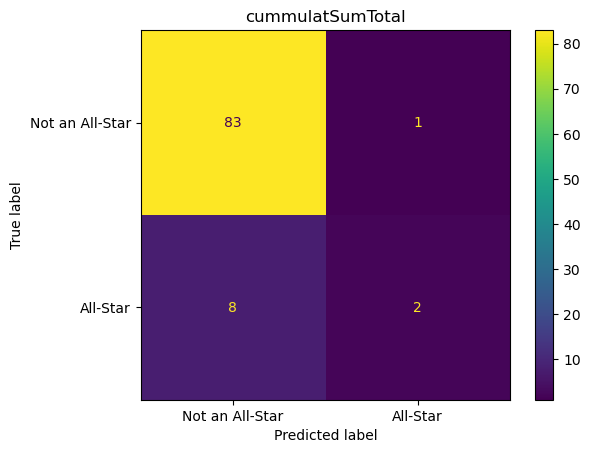

ACCURACY - 90.42553191489363% of samples accurately predicted
PRECISION - 66.66666666666666% of positive predicted samples are positive
RECALL - 20.0% of positive samples were predicted as positive
SPECIFICITY - 98.80952380952381% of negative samples were predicted as negative


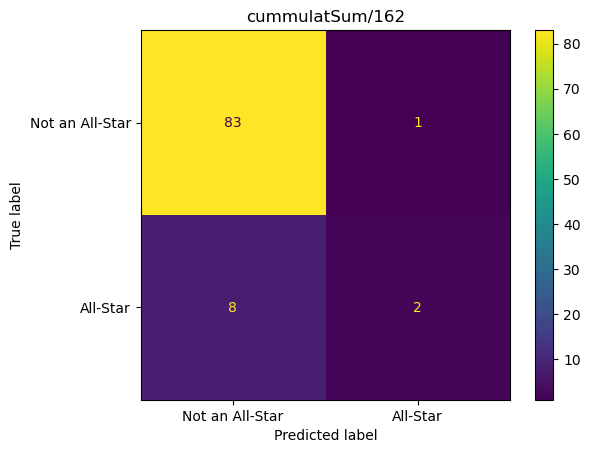

ACCURACY - 90.42553191489363% of samples accurately predicted
PRECISION - 66.66666666666666% of positive predicted samples are positive
RECALL - 20.0% of positive samples were predicted as positive
SPECIFICITY - 98.80952380952381% of negative samples were predicted as negative


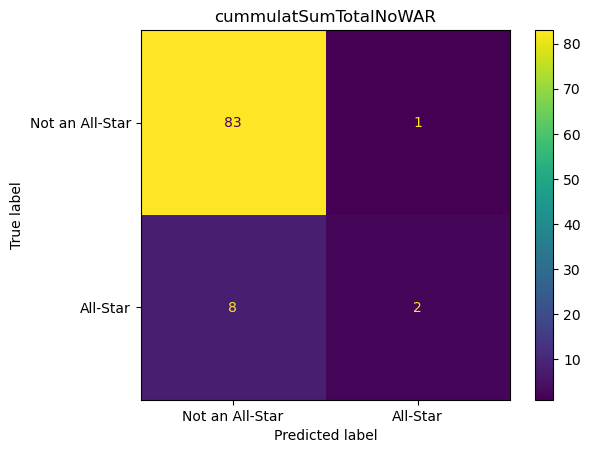

ACCURACY - 90.42553191489363% of samples accurately predicted
PRECISION - 66.66666666666666% of positive predicted samples are positive
RECALL - 20.0% of positive samples were predicted as positive
SPECIFICITY - 98.80952380952381% of negative samples were predicted as negative


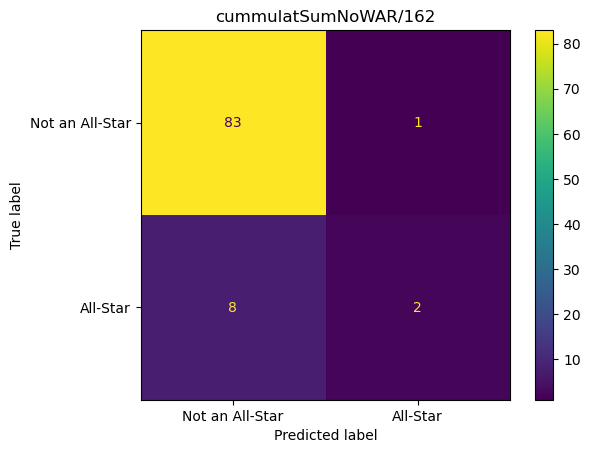

ACCURACY - 90.42553191489363% of samples accurately predicted
PRECISION - 66.66666666666666% of positive predicted samples are positive
RECALL - 20.0% of positive samples were predicted as positive
SPECIFICITY - 98.80952380952381% of negative samples were predicted as negative


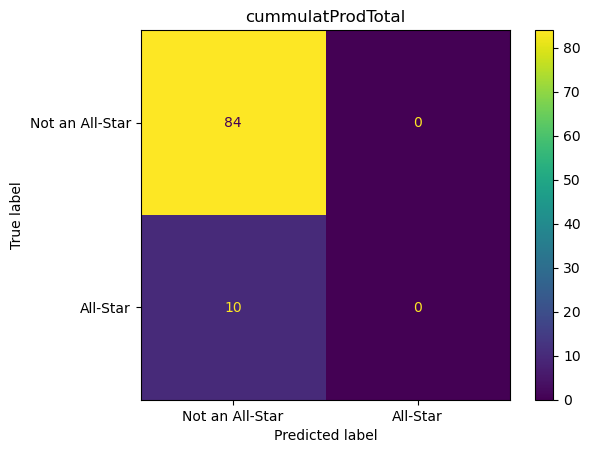

ACCURACY - 89.36170212765957% of samples accurately predicted
PRECISION - 0.0% of positive predicted samples are positive
RECALL - 0.0% of positive samples were predicted as positive
SPECIFICITY - 100.0% of negative samples were predicted as negative


/opt/anaconda3/envs/spyd/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


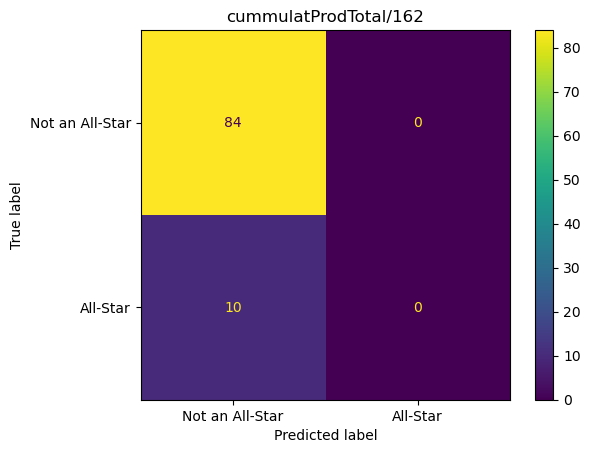

/opt/anaconda3/envs/spyd/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ACCURACY - 89.36170212765957% of samples accurately predicted
PRECISION - 0.0% of positive predicted samples are positive
RECALL - 0.0% of positive samples were predicted as positive
SPECIFICITY - 100.0% of negative samples were predicted as negative


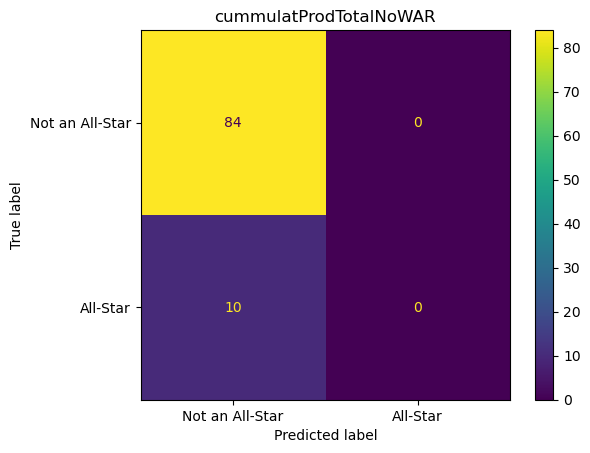

/opt/anaconda3/envs/spyd/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ACCURACY - 89.36170212765957% of samples accurately predicted
PRECISION - 0.0% of positive predicted samples are positive
RECALL - 0.0% of positive samples were predicted as positive
SPECIFICITY - 100.0% of negative samples were predicted as negative


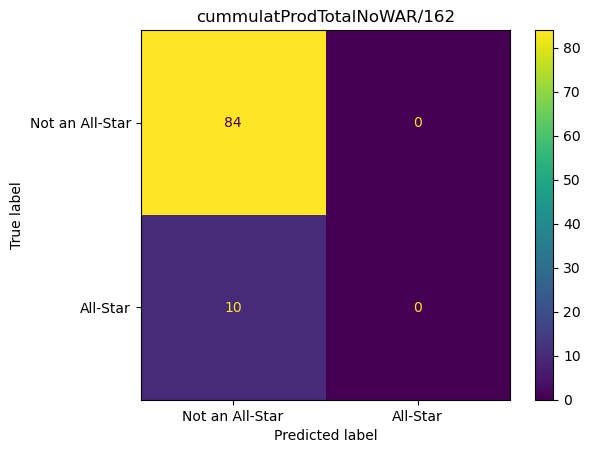

ACCURACY - 89.36170212765957% of samples accurately predicted
PRECISION - 0.0% of positive predicted samples are positive
RECALL - 0.0% of positive samples were predicted as positive
SPECIFICITY - 100.0% of negative samples were predicted as negative


/opt/anaconda3/envs/spyd/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [106]:
battingModels = createModels(batting,advancedStatList,'isAllStar')

We need to specify zero_division but the performance of the models look very poor.

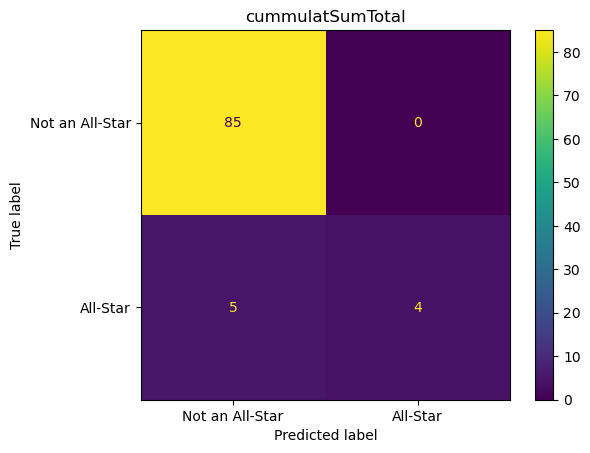

ACCURACY - 94.68085106382979% of samples accurately predicted
PRECISION - 100.0% of positive predicted samples are positive
RECALL - 44.44444444444444% of positive samples were predicted as positive
SPECIFICITY - 100.0% of negative samples were predicted as negative


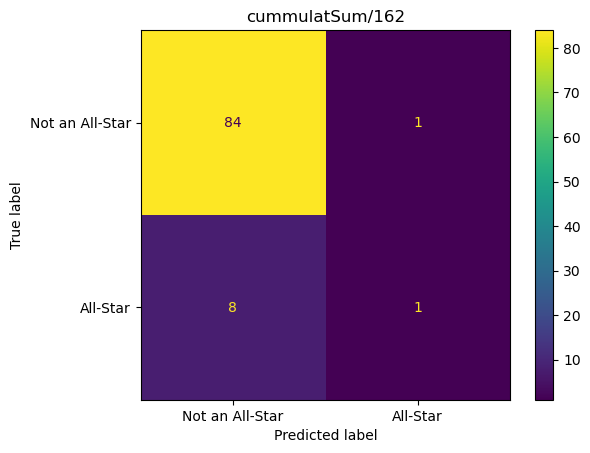

ACCURACY - 90.42553191489363% of samples accurately predicted
PRECISION - 50.0% of positive predicted samples are positive
RECALL - 11.11111111111111% of positive samples were predicted as positive
SPECIFICITY - 98.82352941176471% of negative samples were predicted as negative


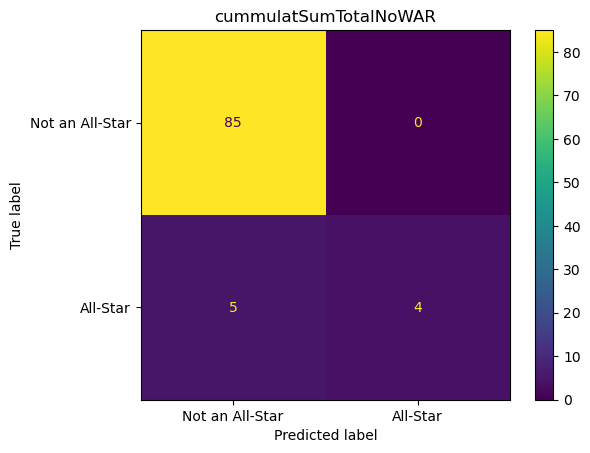

ACCURACY - 94.68085106382979% of samples accurately predicted
PRECISION - 100.0% of positive predicted samples are positive
RECALL - 44.44444444444444% of positive samples were predicted as positive
SPECIFICITY - 100.0% of negative samples were predicted as negative


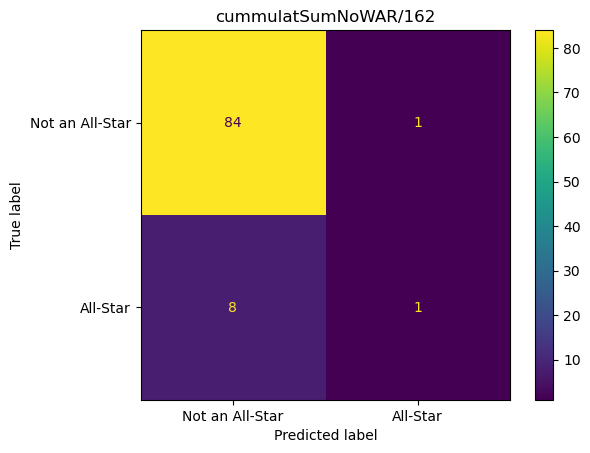

ACCURACY - 90.42553191489363% of samples accurately predicted
PRECISION - 50.0% of positive predicted samples are positive
RECALL - 11.11111111111111% of positive samples were predicted as positive
SPECIFICITY - 98.82352941176471% of negative samples were predicted as negative


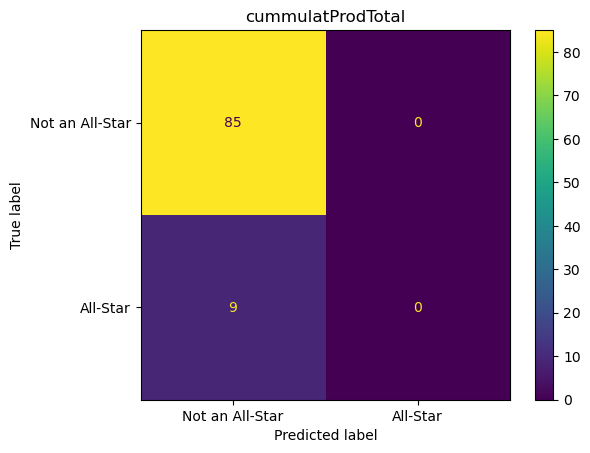

ACCURACY - 90.42553191489363% of samples accurately predicted
PRECISION - 0.0% of positive predicted samples are positive
RECALL - 0.0% of positive samples were predicted as positive
SPECIFICITY - 100.0% of negative samples were predicted as negative


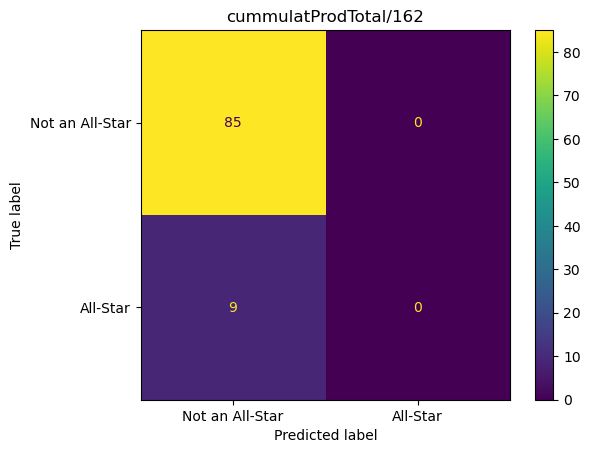

ACCURACY - 90.42553191489363% of samples accurately predicted
PRECISION - 0.0% of positive predicted samples are positive
RECALL - 0.0% of positive samples were predicted as positive
SPECIFICITY - 100.0% of negative samples were predicted as negative


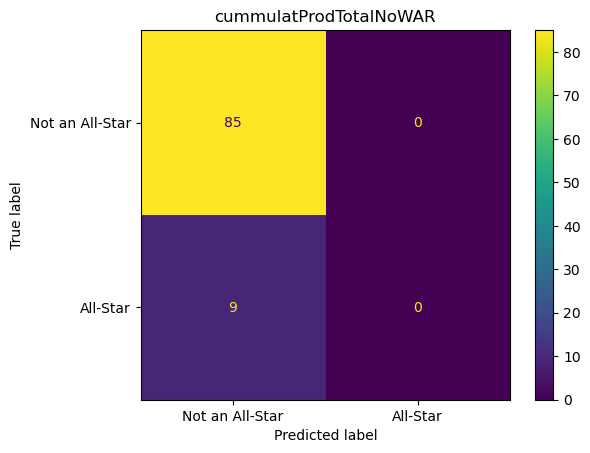

ACCURACY - 90.42553191489363% of samples accurately predicted
PRECISION - 0.0% of positive predicted samples are positive
RECALL - 0.0% of positive samples were predicted as positive
SPECIFICITY - 100.0% of negative samples were predicted as negative


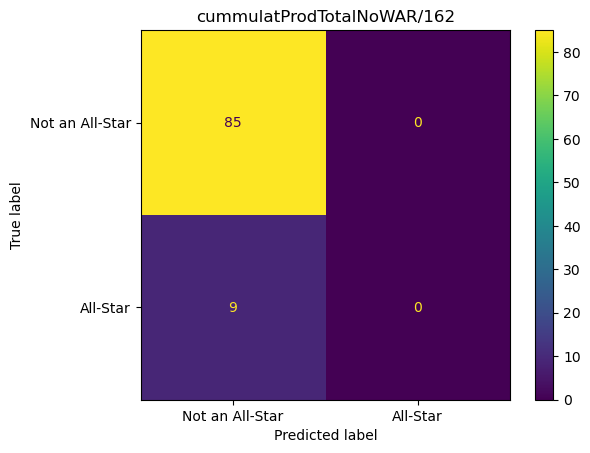

ACCURACY - 90.42553191489363% of samples accurately predicted
PRECISION - 0.0% of positive predicted samples are positive
RECALL - 0.0% of positive samples were predicted as positive
SPECIFICITY - 100.0% of negative samples were predicted as negative


In [110]:
battingModels = createModels(batting,advancedStatList,'isAllStar')

The performance of the models are very poor, especially the product stats, as they cannot predict All-Stars. This shows that binary classification logistic regression is a poor method to model this; using multiple stats would be a better choice.